In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv("data/raw/train.csv")

In [4]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

<Container object of 6 artists>

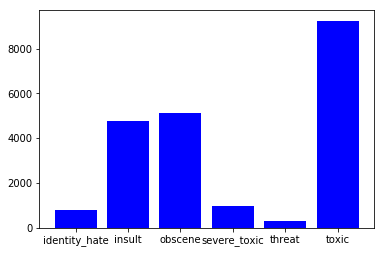

In [5]:
import matplotlib.pyplot as plt
sum_classes = []

for i in classes:
    sum_classes.append(train[i].sum())

plt.bar(classes, sum_classes, 0.8, color="blue")

In [6]:
train["nb_col"] = 0
train["nb_col"] = train[classes].sum(axis=1)

0    86061
1     3833
3     2523
2     2107
4     1076
5      231
6       20
Name: nb_col, dtype: int64


<Container object of 7 artists>

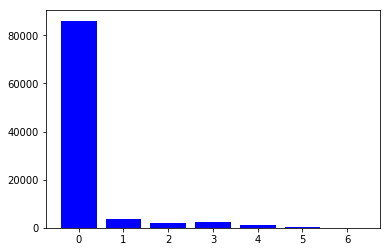

In [7]:
freq_nb_class = train["nb_col"].value_counts()
print(freq_nb_class)
freq_nb_class_dict = dict(freq_nb_class)

plt.bar(freq_nb_class_dict.keys(), freq_nb_class_dict.values(), 0.8, color="blue")

/Users/kforest/anaconda3/envs/keras/bin/python


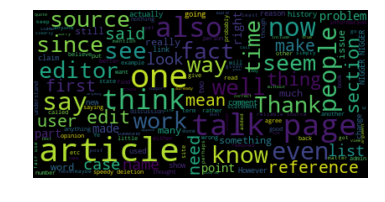

TypeError: 'list' object is not callable

In [12]:
import sys
print(sys.executable)
from wordcloud import WordCloud
corpus = train["comment_text"].str.cat(sep=" ")

wordcloud = WordCloud(max_font_size=40).generate(corpus)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
import nltk
words = nltk.word_tokenize(corpus)

stop_words = nltk.corpus.stopwords.words("english")

In [21]:
words = [word.lower() for word in words]
words = [word for word in words if not word.isnumeric()]
words = [word for word in words if len(word) > 1]
words = [word for word in words if word not in stop_words]

fdist = nltk.FreqDist(words)

In [23]:
for word, frequency in fdist.most_common(50):
    print(u'{};{}'.format(word, frequency))

'';144168
``;93328
's;39973
n't;34271
article;33801
page;27627
wikipedia;27271
talk;21155
would;18432
please;17781
one;17092
like;16949
...;13123
see;13103
also;12320
think;11975
know;11337
people;10885
'm;10793
edit;10769
use;9949
articles;9920
may;9500
time;9173
user;8153
even;8093
thanks;8025
get;8018
make;7745
could;7601
good;7550
information;7440
've;7325
want;6892
well;6854
sources;6726
way;6638
deletion;6619
name;6601
first;6554
pages;6418
help;6279
new;6251
wp;6199
image;6163
source;6151
need;6081
go;6051
say;6027
're;5982


In [24]:
fdist.plot()